In [1]:
import ROOT as R
import pandas as pd
import numpy as np

R.ROOT.EnableImplicitMT()

Welcome to JupyROOT 6.20/06


In [2]:
quark = ['Wjets_HT_vjet0_quark', 'DY_vjet0_quark','top_vjet0_quark',
                                'VV_vjet0_quark','Vg_vjet0_quark','VgS_vjet0_quark',
                                'VVV_vjet0_quark','VBS_vjet0_quark','VBF-V_vjet0_quark']


gluon = ['Wjets_HT_vjet0_gluon','DY_vjet0_gluon','top_vjet0_gluon',
                                'VV_vjet0_gluon','Vg_vjet0_gluon','VgS_vjet0_gluon',
                                'VVV_vjet0_gluon','VBS_vjet0_gluon','VBF-V_vjet0_gluon']

In [10]:
dfs_quark = []
dfs_gluon = []

for q in quark:
    print(q)
    rdf = R.RDataFrame("res_wjetcr/tree/tree_"+q, "plots_test_qgl.root")
    df = pd.DataFrame(rdf.AsNumpy({"vjet_0_qgl_res"}))
    df["sample"] = q
    dfs_quark.append(df)
    
for g in gluon:
    print(g)
    rdf = R.RDataFrame("res_wjetcr/tree/tree_"+g, "plots_test_qgl.root")
    df = pd.DataFrame(rdf.AsNumpy({"vjet_0_qgl_res"}))
    df["sample"] = g
    dfs_gluon.append(df)
    
    

Wjets_HT_vjet0_quark
DY_vjet0_quark
top_vjet0_quark
VV_vjet0_quark
Vg_vjet0_quark
VgS_vjet0_quark
VVV_vjet0_quark
VBS_vjet0_quark
VBF-V_vjet0_quark
Wjets_HT_vjet0_gluon
DY_vjet0_gluon
top_vjet0_gluon
VV_vjet0_gluon
Vg_vjet0_gluon
VgS_vjet0_gluon
VVV_vjet0_gluon
VBS_vjet0_gluon
VBF-V_vjet0_gluon


In [11]:
dfQ = pd.concat(dfs_quark)
dfG = pd.concat(dfs_gluon)

In [12]:
rdf = R.RDataFrame("res_wjetcr/tree/tree_Fake", "plots_test_qgl.root")
dfOthers = pd.DataFrame(rdf.AsNumpy({"vjet_0_qgl_res"}))

rdf = R.RDataFrame("res_wjetcr/tree/tree_DATA", "plots_test_qgl.root")
dfData = pd.DataFrame(rdf.AsNumpy({"vjet_0_qgl_res"}))

In [25]:
rdf = R.RDataFrame("res_wjetcr/tree/tree_Wjets_HT_vbs0_gluon", "plots_test_qgl.root")

In [15]:
deltas = [1.1,1.2,1.3,1.4]
for i, d in enumerate(deltas):
    dfG["vjet_0_qgl_res_"+str(i)] = dfG.vjet_0_qgl_res * d

In [19]:
totMC = np.hstack([dfG['vjet_0_qgl_res'],dfQ['vjet_0_qgl_res'],dfOthers['vjet_0_qgl_res']])

In [22]:
totData = dfData['vjet_0_qgl_res'].values

In [ ]:
hMC = np.histogram(totMC, 50,range=(0,1))
hData = np.histogram(totData, 50,range=(0,1))
hRatio = hData[0] / hMC[0]

In [28]:
import matplotlib.pyplot as plt

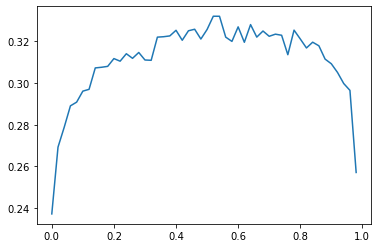

In [37]:
plt.plot(hMC[1][:-1], hRatio)

In [6]:
quarks_hs = []
for q in quark:
    h = f.Get('res_wjetcr/vjet_0_qgl_res_morebins/histo_' + q)
    quarks_hs.append(h)
    
gluons_hs = []
for g in gluon:
    h = f.Get('res_wjetcr/vjet_0_qgl_res_morebins/histo_' + g)
    gluons_hs.append(h)
    

hQ = quarks_hs[0].Clone("h_quark")
for q in quarks_hs[1:]:
    hQ.Add(q)
    
hG = gluons_hs[0].Clone("h_gluon")
for q in gluons_hs[1:]:
    hG.Add(q)
    
hData = f.Get('res_wjetcr/vjet_0_qgl_res_morebins/histo_DATA')
hOthers = f.Get('res_wjetcr/vjet_0_qgl_res_morebins/histo_Fake')

In [6]:
hTotMC = hQ.Clone("h_tot_MC")
hTotMC.Add(hG)
hTotMC.Add(hOthers)

True

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 6 points have been skipped


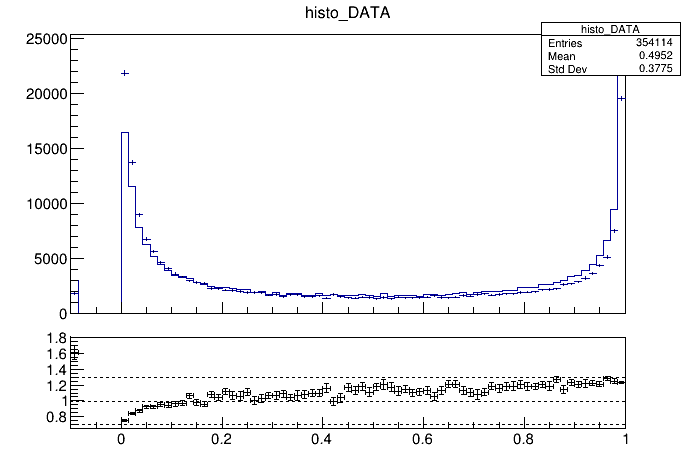

In [7]:
c= R.TCanvas()
ratio = R.TRatioPlot(hData, hTotMC)
ratio.Draw()
c.Draw()

In [7]:
def morphing(h, delta):
    new_histo = h.Clone("h_morphing_"+str(delta))
    new_histo.Reset()
    
    #exclude bin1 that is the underflow
    for i in range(2, h.GetNbinsX()+1):
        x = h.GetBinCenter(i)
        newX = x*delta
        if newX > 1: newX= 0.99
        new_bin = new_histo.FindBin(newX)
        new_histo.SetBinContent(new_bin, h.GetBinContent(i))
        
        print(x, newX, i, new_bin)
    
    return new_histo

In [14]:
hGnew = morphing(hG, 1.15)

-0.07857142857142857 -0.09035714285714284 2 1
-0.06428571428571428 -0.07392857142857141 3 2
-0.05 -0.057499999999999996 4 3
-0.03571428571428571 -0.041071428571428564 5 5
-0.021428571428571422 -0.024642857142857133 6 6
-0.007142857142857147 -0.008214285714285719 7 7
0.0071428571428571435 0.008214285714285714 8 8
0.021428571428571436 0.02464285714285715 9 9
0.035714285714285726 0.041071428571428585 10 10
0.05000000000000002 0.057500000000000016 11 12
0.06428571428571431 0.07392857142857144 12 13
0.07857142857142857 0.09035714285714284 13 14
0.09285714285714286 0.10678571428571428 14 15
0.10714285714285715 0.12321428571428572 15 16
0.12142857142857144 0.13964285714285715 16 17
0.13571428571428573 0.15607142857142858 17 18
0.15000000000000002 0.17250000000000001 18 20
0.1642857142857143 0.18892857142857145 19 21
0.1785714285714286 0.20535714285714288 20 22
0.1928571428571429 0.2217857142857143 21 23
0.20714285714285718 0.23821428571428574 22 24
0.22142857142857147 0.25464285714285717 23 2

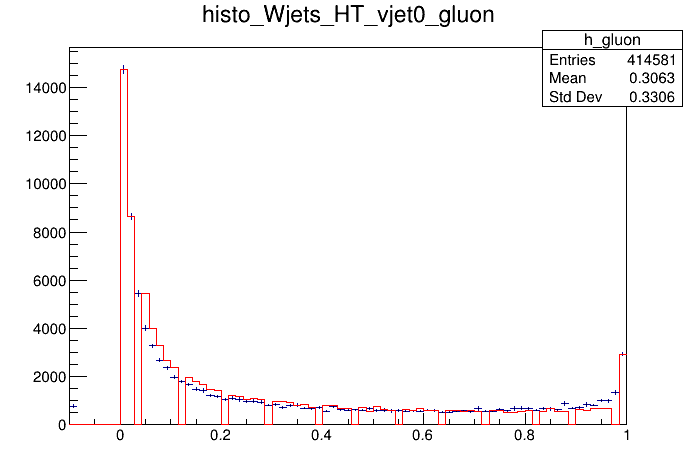

In [12]:
c= R.TCanvas()
hG.Draw()
hGnew.Draw("same")
hGnew.SetLineColor(R.kRed)
c.Draw()

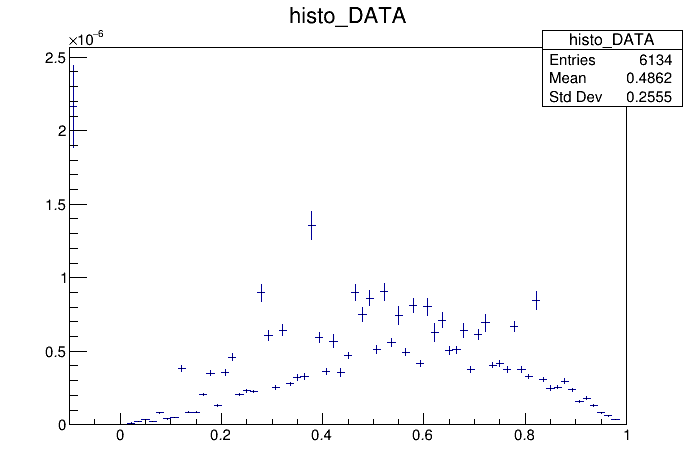

In [15]:
hTotMC2 = hQ.Clone("h_tot_MC2")
hTotMC2.Add(hGnew)
hTotMC2.Add(hOthers)

hData.Divide(hTotMC2)
            
c= R.TCanvas()
hData.Draw()
c.Draw()

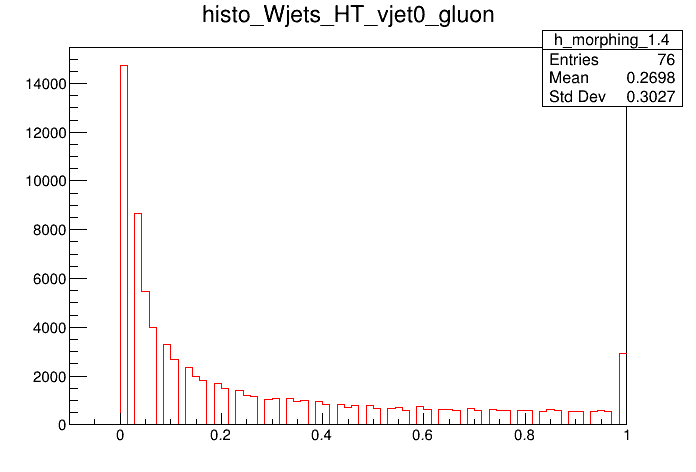

In [13]:
c= R.TCanvas()
hGnew.Draw()
c.Draw()